In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [22]:
dataset_name = "ann_2022-03-01_2022-03-31.csv"
df_dataset = pd.read_csv(f"dataset/{dataset_name}", header=0, parse_dates=["timestamp"], index_col=0)
FEATURES = 3
label_name = "Eeg_label"

features = df_dataset.iloc[:,0:FEATURES].values
label = df_dataset.loc[:, label_name].values.reshape(-1,1)

x_train = features[0:int(len(features)*0.7)]
x_valid = features[int(len(features)*0.7):int(len(features)*0.8)]
x_test = features[int(len(features)*0.8):]

y_train = label[0:int(len(label)*0.7)]
y_valid = label[int(len(label)*0.7):int(len(label)*0.8)]
y_test = label[int(len(label)*0.8):]

In [23]:
input_layer = tf.keras.layers.Input(shape=(FEATURES))
ann_1 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
ann_2 = tf.keras.layers.Dense(64, activation="relu")(ann_1)
ann_3 = tf.keras.layers.Dense(32, activation="relu")(ann_2)
output_layer = tf.keras.layers.Dense(1, activation=None)(ann_3)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
loss = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=loss, optimizer=opt)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [24]:
stopping_criterion = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=200,
                                                      verbose=1,
                                                      mode='auto')

history = model.fit(x = x_train, y = y_train, epochs=1000, batch_size=32, validation_data=(x_valid, y_valid), callbacks=[stopping_criterion])

Epoch 1/100
57/57 [==============================] - 1s 3ms/step - loss: 5144.1465 - val_loss: 930.7533
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 1004.3809 - val_loss: 413.5796
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 913.5444 - val_loss: 221.3243
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 849.2897 - val_loss: 213.3079
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 841.8091 - val_loss: 300.8080
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 864.7515 - val_loss: 236.7153
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 826.7072 - val_loss: 171.1060
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 869.0665 - val_loss: 182.9149
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 842.4236 - val_loss: 328.9896
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - los

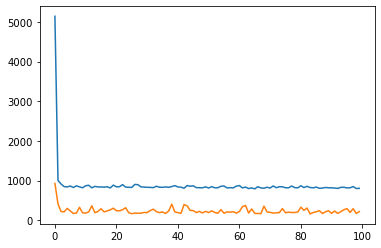

In [30]:
from matplotlib import pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])